In [1]:
# Pandas is a library for basic data analysis
import pandas as pd

# NumPy is a library for advanced mathematical computation
import numpy as np

# MatPlotLib is a library for basic data visualization
import matplotlib.pyplot as plt

# SeaBorn is a library for advanced data visualization
import seaborn as sns

In [2]:
sns.set(style="white", context="notebook", palette="deep")

COLOR_COLUMNS = ["#66C2FF", "#5CD6D6", "#00CC99", "#85E085", "#FFD966", "#FFB366", "#FFB3B3", "#DAB3FF", "#C2C2D6"]

sns.set_palette(palette=COLOR_COLUMNS, n_colors=4)

In [3]:
% ls

AppleStore.csv* notebook.ipynb  pokemon.ipynb


In [4]:
FILEPATH = "AppleStore.csv"

df = pd.read_csv(FILEPATH)
df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,game_enab
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,0
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,0
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,0
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,0
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,0


In [5]:
df.iloc[3].track_name

'eBay: Best App to Buy, Sell, Save! Online Shopping'

In [6]:
df.loc[3].track_name

'eBay: Best App to Buy, Sell, Save! Online Shopping'

In [7]:
df.describe(include="object")

,track_name,currency,ver,cont_rating,prime_genre
count,7197,7197,7197,7197,7197
unique,7195,1,1590,4,23
top,Mannequin Challenge,USD,1.0,4+,Games
freq,2,7197,317,4433,3862


In [8]:
# Drop a series
df = df.drop("currency", axis="columns")

In [9]:
# reduce the float number of size_bytes and drop the size_bytes series
df["size_Mb"] = df["size_bytes"].apply(lambda num: np.around(num / 1_000_000, decimals=2))
df.drop("size_bytes", axis="columns", inplace=True)

In [10]:
df.head()

,id,track_name,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,game_enab,size_Mb
0,281656475,PAC-MAN Premium,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,0,100.79
1,281796108,Evernote - stay organized,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,0,158.58
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,0,100.52
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,0,128.51
4,282935706,Bible,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,0,92.77


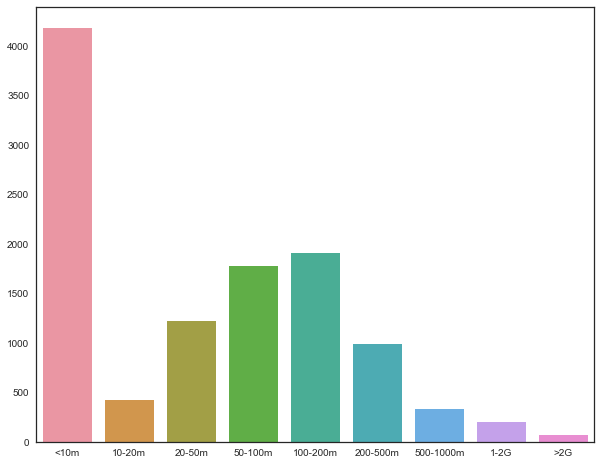

In [11]:
plt.subplots(figsize=(10, 8))

# sequence of scalars : Defines the bin edges allowing for non-uniform width. No extension of the range of x is done.
BINS = [0.00, 10.00, 20.00, 50.00, 100.00, 200.00, 500.00, 1000.00, 2000.00, np.inf]
LABELS = ["<10m", "10-20m", "20-50m", "50-100m", "100-200m", "200-500m", "500-1000m", "1-2G", ">2G"]

freqs = pd.cut(x=df["size_Mb"], bins=BINS, include_lowest=True, labels=LABELS)
sns.barplot(y=freqs.value_counts().values, x=freqs.value_counts().index)

(-1.1172128515167876,
 1.1008196595960376,
 -1.11044528544266,
 1.1165638157433673)

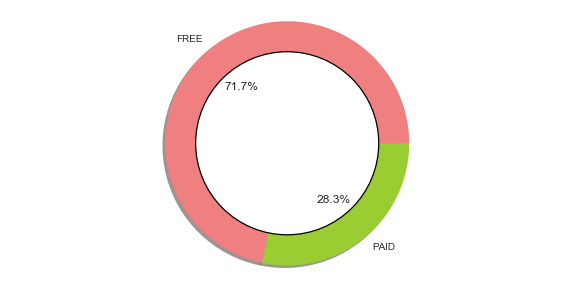

In [12]:
# add a column containing free vs. paid price attributes for ease of use
BINS = [-np.inf, 0.00, np.inf]
LABELS = ["FREE", "PAID"]
colors = ['lightcoral', 'yellowgreen']

df["price_categories"] = pd.cut(df["price"], BINS, include_lowest=True, labels=LABELS)

# Now, let's initialize our plotting space in MatPlotLib.
fig, axs = plt.subplots(figsize=(10, 5))
price_df = df["price_categories"].value_counts()

# Draw the circle
plt.pie(price_df.values, labels=LABELS, colors=colors, autopct='%1.1f%%', shadow=True)
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')

In [13]:
###### Why use loc vs just a subscript
free_apps = df.loc[df["price_categories"] == "FREE"]
paid_apps = df.loc[df["price_categories"] == "PAID"]

In [14]:
# sort our sliced categorical price data based on total user ratings
free_apps_rated = free_apps.sort_values(by=["rating_count_tot"], ascending=False)
paid_apps_rated = paid_apps.sort_values(by=["rating_count_tot"], ascending=False)

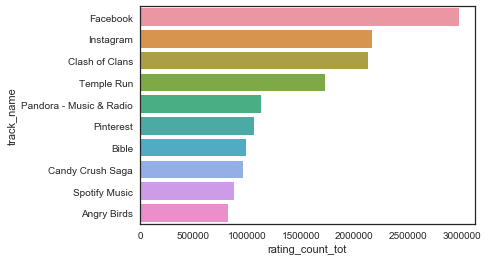

In [15]:
# only visualize the top ten highest rated apps in each category
sns.barplot(x=free_apps_rated["rating_count_tot"][:10], y=free_apps_rated["track_name"][:10])

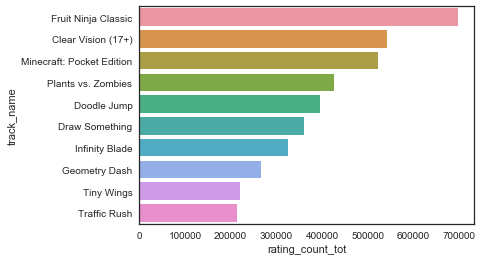

In [16]:
# top paid apps
sns.barplot(x=paid_apps_rated["rating_count_tot"][:10], y=paid_apps_rated["track_name"][:10])

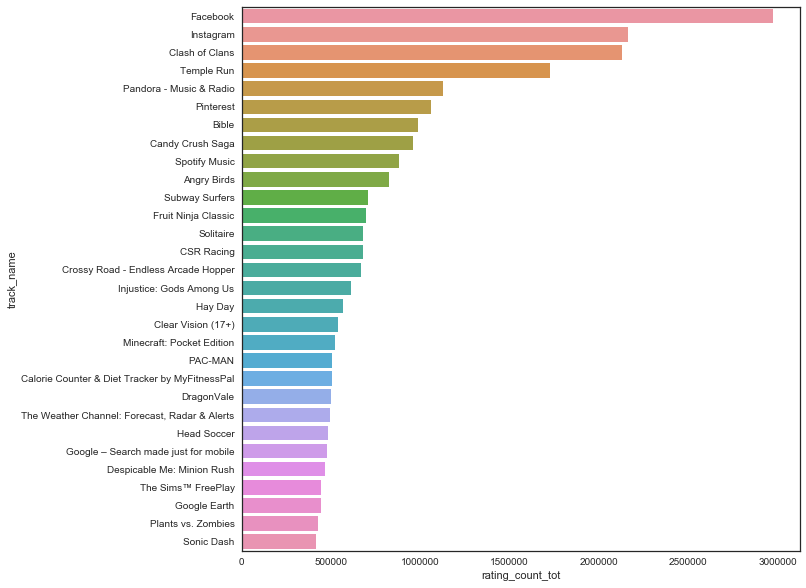

In [17]:
plt.subplots(figsize=(10, 10))

ratings = df.sort_values(by=["rating_count_tot"], ascending=False)
sns.barplot(x=ratings["rating_count_tot"][:30], y=ratings["track_name"][:30])


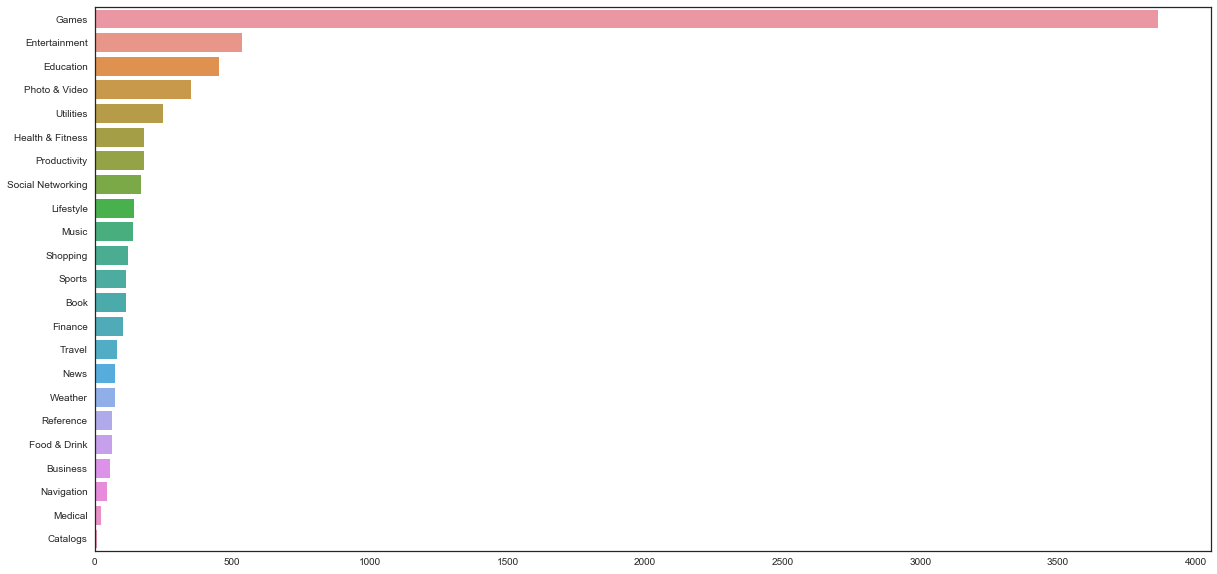

In [18]:
# Genres
genres = df["prime_genre"].value_counts()
genres.sort_values(ascending=False, inplace=True)

plt.subplots(figsize=(20, 10))
sns.barplot(x=genres.values, y=genres.index, order=genres.index, orient="h")

In [19]:
# Slice only the games
games = df.loc[df["prime_genre"] == "Games"]
games.head()

,id,track_name,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,game_enab,size_Mb,price_categories
0,281656475,PAC-MAN Premium,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,0,100.79,PAID
5,283619399,Shanghai Mahjong,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1,0,10.49,PAID
9,284736660,Ms. PAC-MAN,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1,0,70.02,PAID
10,284791396,Solitaire by MobilityWare,4.99,76720,4017,4.5,4.5,4.10.1,4+,Games,38,4,11,1,0,49.62,PAID
11,284815117,SCRABBLE Premium,7.99,105776,166,3.5,2.5,5.19.0,4+,Games,37,0,6,1,0,227.55,PAID


[Text(0,0.5,'percent (%)'), Text(0.5,0,'USD')]

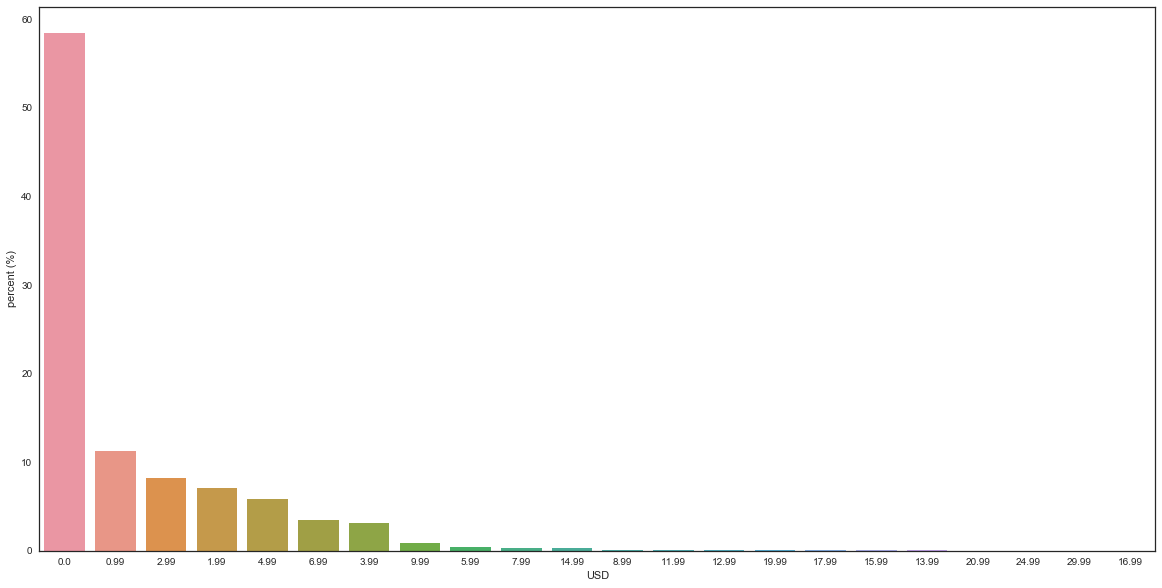

In [20]:
prices = (games.price.value_counts()) / (games.price.shape[0]) * 100
prices.sort_values(ascending=False, inplace=True)

plt.subplots(figsize=(20, 10))
ax = sns.barplot(y=prices.values, x=prices.index, order=prices.index)
ax.set(xlabel="USD", ylabel="percent (%)")

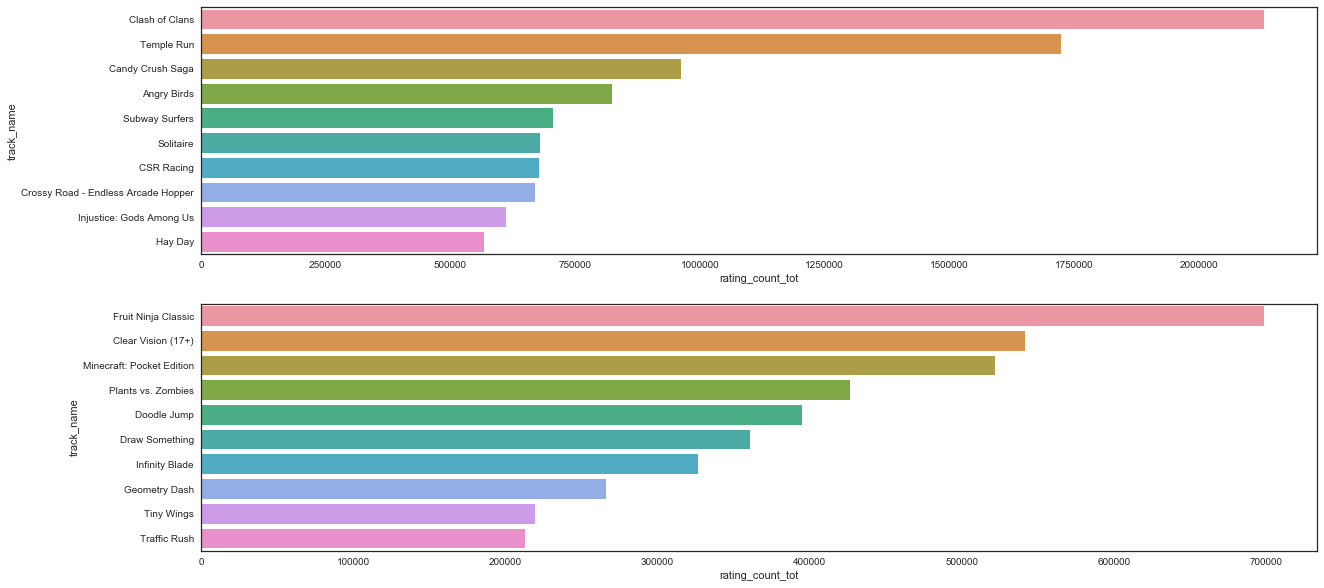

In [21]:
free_games = games.loc[games["price_categories"] == "FREE"]
paid_games = games.loc[games["price_categories"] == "PAID"]

free_games_rated = free_games.sort_values(by=["rating_count_tot"], ascending=False)
paid_games_rated = paid_games.sort_values(by=["rating_count_tot"], ascending=False)

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.barplot(x=free_games_rated["rating_count_tot"][:10], y=free_games_rated["track_name"][:10], ax=ax1)
sns.barplot(x=paid_games_rated["rating_count_tot"][:10], y=paid_games_rated["track_name"][:10], ax=ax2)

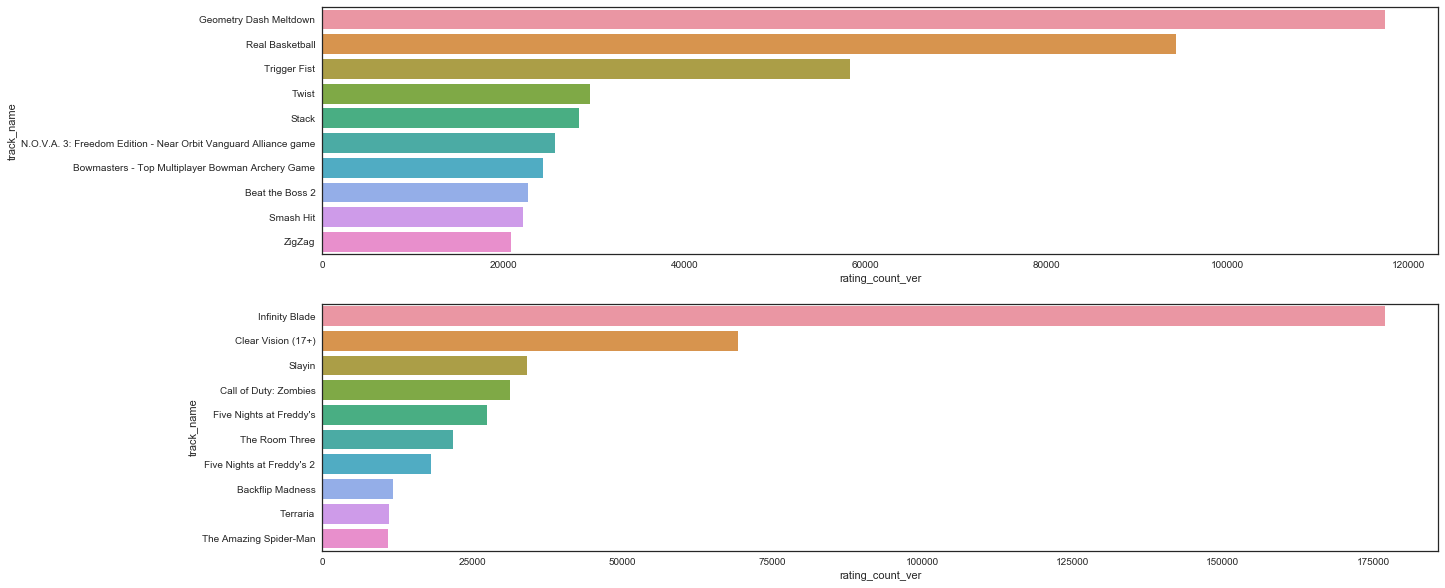

In [22]:
free_games_rated_curr = free_games.sort_values(by=["rating_count_ver"], ascending=False)
paid_games_rated_curr = paid_games.sort_values(by=["rating_count_ver"], ascending=False)

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.barplot(x=free_games_rated_curr["rating_count_ver"][:10], y=free_games_rated_curr["track_name"][:10], ax=ax1)
sns.barplot(x=paid_games_rated_curr["rating_count_ver"][:10], y=paid_games_rated_curr["track_name"][:10], ax=ax2)

In [23]:
df.head()

,id,track_name,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,game_enab,size_Mb,price_categories
0,281656475,PAC-MAN Premium,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,0,100.79,PAID
1,281796108,Evernote - stay organized,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,0,158.58,FREE
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,0,100.52,FREE
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,0,128.51,FREE
4,282935706,Bible,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,0,92.77,FREE


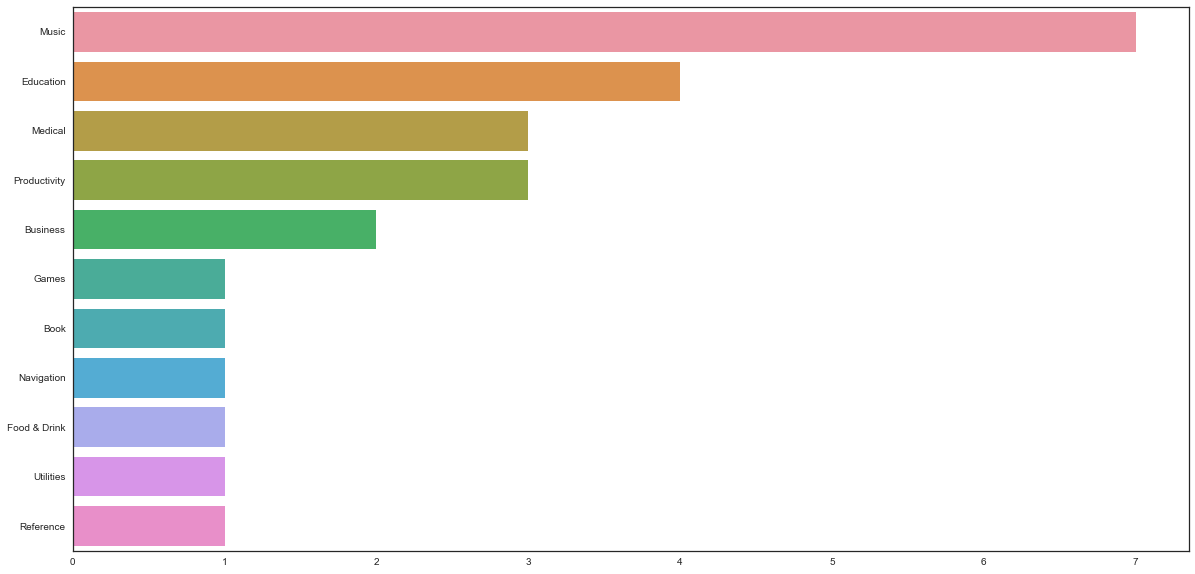

In [24]:
# Top 25 priced app categories
top_25_priced_apps = df.sort_values(by="price", ascending=False)[:25]

genres = top_25_priced_apps["prime_genre"].value_counts()
genres.sort_values(ascending=False, inplace=True)

plt.subplots(figsize=(20, 10))
sns.barplot(x=genres.values, y=genres.index, order=genres.index, orient="h")